<a href="https://colab.research.google.com/github/eduardo20/blazars/blob/master/Acon_3FGL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACONDICIONAMIENTO DE LOS DATOS DEL CATALOGO FERMI-3GL
## Comenzamos cargando las librerias que vamos a utilizar para limpiar la base de datos, pandas, numpy, seaborn, y sklearn para aplicar clasificadores machine learning

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# After executing the cell, Drive
# files will be present in "/content/drive/My Drive".
from subprocess import check_output
print(check_output(["ls", "../content/drive/My Drive"]).decode("utf8"))
#!ls "/content/drive/My Drive"

In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



### La BBDD con las observaciones está contenida en el archivo modificado  "***FERMI3FGL4Y_short***" y es la base de datos con 4 años de observaciones 3FGL de la misión Fermi.

https://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/3FGL_Table4_full.pdf
### Acceso a tabla :
https://heasarcdev.gsfc.nasa.gov/W3Browse/fermi/fermi3fgl.html


In [0]:
#archivo_fermi=gui_fname()
#archivo_fermi
archivo_fermi='/content/drive/My Drive/FERMI3FGL4Y_short.xls'

In [0]:
pd.set_option("display.max_columns", 73) # ver el numero de columnas en este caso 73
df = pd.read_excel(archivo_fermi, sheet_name='fermi3fgl')
df = pd.read_excel(archivo_fermi)
df.shape

(3034, 46)

In [0]:
col_=df.columns
#col_[0]
print(type(df))
df.head(4)

<class 'pandas.core.frame.DataFrame'>


,name,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags
0,3FGL J0542.2-8737,85.5603,-87.6185,4.170300e-10,2.03895,0.14339,6.431914,300.3610,-27.8130,2499.96,6.744600e-14,1.332100e-14,4.636140e-12,9.172090e-13,0.308,PowerLaw,2.0389,5.856320e-09,2.706810e-09,-2.661290e-09,1.401870e-12,2.210,3.402460e-10,4.098260e-10,NaN,2.325300e-13,0.782,2.440210e-10,1.023570e-10,-9.301360e-11,5.841320e-13,2.924,1.601190e-10,1.094290e-12,5.529,2.434160e-11,4.264750e-13,3.656,50.015041,NaN,NaN,NaN,NaN,NaN,bcu,256
1,3FGL J2108.6-8619,317.1631,-86.3176,1.974810e-10,1.74000,0.26993,4.728537,306.4151,-29.1604,8678.96,3.518900e-15,1.118300e-15,2.571730e-12,8.174750e-13,0.417,PowerLaw,1.7400,1.034170e-09,2.552510e-09,NaN,2.550060e-13,0.438,4.628000e-10,4.352200e-10,-4.140330e-10,3.277170e-13,1.067,6.058490e-11,8.389500e-11,NaN,1.493900e-13,0.841,2.303760e-12,1.631330e-14,0.138,5.805490e-11,1.151920e-12,5.852,35.195969,NaN,NaN,NaN,NaN,NaN,bcu,4
2,3FGL J1026.4-8542,156.6050,-85.7152,9.074170e-10,2.01336,0.08438,13.433965,300.1673,-23.6462,2222.71,1.858600e-13,2.060600e-14,1.011740e-11,1.150420e-12,0.511,PowerLaw,2.0134,1.008810e-08,3.018620e-09,-2.949990e-09,2.420950e-12,3.427,1.979730e-09,5.195480e-10,-5.032010e-10,1.357070e-12,4.173,5.411360e-10,1.170220e-10,-1.090790e-10,1.298620e-12,6.251,2.340260e-10,1.604210e-12,8.382,8.555690e-11,1.514590e-12,7.324,41.696239,NaN,NaN,NaN,NaN,NaN,bll,0
3,3FGL J2337.2-8425,354.3135,-84.4224,2.871060e-10,2.14096,0.23347,4.704169,305.0302,-32.4005,3273.28,2.599700e-14,6.875100e-15,3.221300e-12,9.592510e-13,0.886,PowerLaw,2.1410,2.258510e-09,3.722600e-09,NaN,5.352550e-13,0.540,1.179500e-09,5.109650e-10,-4.947260e-10,7.965150e-13,2.470,2.124800e-10,1.084590e-10,-1.024340e-10,5.035670e-13,2.231,2.641360e-11,1.783710e-13,2.012,4.363480e-11,7.340930e-13,4.597,26.655762,NaN,NaN,NaN,NaN,NaN,NaN,0


In [0]:
#contamos el numero de espectros que hay de cada tipo en la BBDD
clase='source_type'
#print(df['ra']) 
df_bl = df.loc[(df[clase] == 'bcu')]
df['spectrum_type'].apply(pd.Series).stack().value_counts()

PowerLaw            2523
LogParabola          395
PLExpCutoff          110
PLSuperExpCutoff       6
dtype: int64

In [0]:
clase='source_type'


## Seleccionamos en nuevo dataframe los blazars y unknown

In [0]:
df['source_type'].apply(pd.Series).stack().value_counts()

bll      642
bcu      568
fsrq     446
PSR      143
spp       49
FSRQ      38
psr       24
BLL       18
glc       15
SNR       12
rdg       12
snr       11
PWN       10
BCU        5
sbg        4
nlsy1      3
RDG        3
agn        3
HMB        3
ssrq       3
NLSY1      2
GAL        2
pwn        2
SFR        1
gal        1
sey        1
BIN        1
NOV        1
css        1
dtype: int64

## Creamos columna copia con los objetos seleccionados. Despues filtraremos los 
## detectados por asociación ( en minusculas)

In [0]:
df_bl[('source_type_a')]=df_bl[('source_type')]
df_bl.head(3)

,name,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,source_type_a
0,3FGL J0542.2-8737,85.5603,-87.6185,4.170300e-10,2.03895,0.14339,6.431914,300.3610,-27.8130,2499.96,6.744600e-14,1.332100e-14,4.636140e-12,9.172090e-13,0.308,PowerLaw,2.0389,5.856320e-09,2.706810e-09,-2.661290e-09,1.401870e-12,2.210,3.402460e-10,4.098260e-10,NaN,2.325300e-13,0.782,2.440210e-10,1.023570e-10,-9.301360e-11,5.841320e-13,2.924,1.601190e-10,1.094290e-12,5.529,2.434160e-11,4.264750e-13,3.656,50.015041,NaN,NaN,NaN,NaN,NaN,bcu,256,bcu
1,3FGL J2108.6-8619,317.1631,-86.3176,1.974810e-10,1.74000,0.26993,4.728537,306.4151,-29.1604,8678.96,3.518900e-15,1.118300e-15,2.571730e-12,8.174750e-13,0.417,PowerLaw,1.7400,1.034170e-09,2.552510e-09,NaN,2.550060e-13,0.438,4.628000e-10,4.352200e-10,-4.140330e-10,3.277170e-13,1.067,6.058490e-11,8.389500e-11,NaN,1.493900e-13,0.841,2.303760e-12,1.631330e-14,0.138,5.805490e-11,1.151920e-12,5.852,35.195969,NaN,NaN,NaN,NaN,NaN,bcu,4,bcu
9,3FGL J1224.6-8312,186.1653,-83.2093,4.487580e-10,2.69452,0.10959,7.470914,302.0894,-20.3814,488.02,5.254500e-12,6.981400e-13,8.609830e-12,1.159620e-12,1.103,PowerLaw,2.6945,1.585340e-08,4.358800e-09,-4.375290e-09,3.564340e-12,3.692,3.458890e-09,6.843420e-10,-6.694150e-10,2.194040e-12,5.447,3.306700e-10,1.205140e-10,-1.117190e-10,7.434510e-13,3.296,7.640900e-11,4.846760e-13,3.325,3.678400e-12,5.084610e-14,0.469,56.541351,NaN,NaN,NaN,NaN,NaN,bcu,0,bcu


In [0]:

df_bl = df.loc[(df[clase] == 'unknown')  | (df[clase]== 'bcu')  | (df[clase]== 'bll')  | (df[clase]== 'fsrq') | (df[clase] == 'UNKNOWN')  | (df[clase]== 'BCU')  | (df[clase]== 'BLL')  | (df[clase]== 'FSRQ')]
df_bl.reset_index(drop=True , inplace = True) #cada columna gurada referencias del indice que tenia en dataframe df, con esto los reordenamos de 0 en adelante.
df_bl.shape
#df_bl.to_excel('blazars.xlsx') 
df_bl.shape


(1717, 46)

In [0]:

df_bl['source_type'].apply(pd.Series).stack().value_counts()

bll     642
bcu     568
fsrq    446
FSRQ     38
BLL      18
BCU       5
dtype: int64

## Eliminamos los blazars no clasificados (BCU|bcu)
## Creamos otro dataframe con los BCU a clasificar, lo salvaremos en un archivo 
## al final del notebook.

In [0]:
df_bl = df.loc[ (df[clase]== 'bll')  | (df[clase]== 'fsrq') | (df[clase]== 'BLL')  | (df[clase]== 'FSRQ')]
df_UNK = df.loc[ (df[clase]== 'BCU')  | (df[clase]== 'bcu') ]

In [0]:

df_UNK.head(3)

df_UNK['source_type'].apply(pd.Series).stack().value_counts()



bcu    568
BCU      5
dtype: int64

## Estudiamos los objetos con warnings en la detección ( valor del Flag)

In [0]:
df_bl['analysis_flags'].apply(pd.Series).stack().value_counts()
df_bl.shape

(1144, 46)

## Creamos otro dataframe con los objetos sin problemas de deteccion Flag=0
## df_bl_NF (NO FLAGS)

In [0]:
df_bl_NF = df_bl.loc[ (df_bl['analysis_flags']== 0) ]
df_bl_NF['analysis_flags'].apply(pd.Series).stack().value_counts()
#df_bl_NF.head(3)

0    1086
dtype: int64

# Converssion de tipo cadena a tipo númerico 
#### -Los clasificadores necesitan tipos númericos para realizar el ajuste. Asignamos a los Blazars tipo Bl Lac = 1 y los FSRQ = 0
#### -Adicionalmente convertimos los tipos espectrales ajustados de sus denominaciones a enteros segun PowerLaw=1, LogParabola=2 , PLSuperExpCutoff =3 , PLSuperExpCutoff =4
####PowerLaw            2523
####LogParabola          395
####PLExpCutoff          110
####PLSuperExpCutoff       6
#####https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/source_models.html
#### -Reseteamos los indicices del dataframe para trabajar con el de manera ordenada

In [0]:
df_bl['spectrum_type'].apply(pd.Series).stack().value_counts()

PowerLaw            1007
LogParabola          136
PLSuperExpCutoff       1
dtype: int64

In [0]:
df_UNK['spectrum_type'].apply(pd.Series).stack().value_counts()

PowerLaw       551
LogParabola     22
dtype: int64

###PLExpCutoff es esliminada de la base de datos, pertence a otro tipo distinto de objetos


In [0]:
df_bl.loc[df_bl[clase] == 'bll' , clase]=1
df_bl.loc[df_bl[clase] == 'BLL' , clase]=1
df_bl.loc[df_bl[clase] == 'fsrq' ,clase]=0
df_bl.loc[df_bl[clase] == 'FSRQ' , clase]=0
df_bl.loc[df_bl['spectrum_type'] == 'PowerLaw' , 'spectrum_type']=1
df_bl.loc[df_bl['spectrum_type'] == 'LogParabola' , 'spectrum_type']=2
df_bl.loc[df_bl['spectrum_type'] == 'PLExpCutoff' , 'spectrum_type']=4
df_bl.loc[df_bl['spectrum_type'] == 'PLSuperExpCutoff' , 'spectrum_type']=3

df_UNK.loc[df_UNK[clase] == 'bcu' ,clase]=2
df_UNK.loc[df_UNK[clase] == 'BCU' , clase]=2
df_UNK.loc[df_UNK['spectrum_type'] == 'PowerLaw' , 'spectrum_type']=1
df_UNK.loc[df_UNK['spectrum_type'] == 'LogParabola' , 'spectrum_type']=2
df_UNK.loc[df_UNK['spectrum_type'] == 'PLExpCutoff' , 'spectrum_type']=4
df_UNK.loc[df_UNK['spectrum_type'] == 'PLSuperExpCutoff' , 'spectrum_type']=3

df_bl.reset_index(drop=True , inplace = True)
df_UNK.reset_index(drop=True , inplace = True)


In [0]:
df_bl.shape

(1144, 46)

In [0]:
df_UNK['spectrum_type'].apply(pd.Series).stack().value_counts()

1    551
2     22
dtype: int64

## Definimos una serie de discriminantes extraidos de la bibliografía. (aqui completar fuentes y definir bien los discriminantes)


In [0]:
f1='flux_100_300_mev'
f2='flux_0p3_1_gev'
f3='flux_1_3_gev'
f4='flux_3_10_gev'
f5='flux_10_100_gev'

E1='nufnu_100_300_mev'
E2='nufnu_0p3_1_gev'
E3='nufnu_1_3_gev'
E4='nufnu_10_100_gev'

#df_LB.head(10)
#definicion clasica
df_bl['HR12'] = (df_bl[f2]-df_bl[f1])/ (df_bl[f2]+df_bl[f1])
df_bl['HR23'] = (df_bl[f3]-df_bl[f2])/ (df_bl[f3]+df_bl[f2])
df_bl['HR34'] = (df_bl[f4]-df_bl[f3])/ (df_bl[f4]+df_bl[f3])
df_bl['HR45'] = (df_bl[f5]-df_bl[f4])/ (df_bl[f5]+df_bl[f4])
# definicion alternativa
#df_bl['HR12'] = (df_bl[f2]*df_bl[E2]-df_bl[f1]*df_bl[E1])/ (df_bl[f2]*df_bl[E2]+df_bl[f1]*df_bl[E1])
#df_bl['HR23'] = (df_bl[f3]*df_bl[E3]-df_bl[f2]*df_bl[E2])/ (df_bl[f3]*df_bl[E3]+df_bl[f2]*df_bl[E2])
#df_bl['HR34'] = (df_bl[f4]*df_bl[E4]-df_bl[f3]*df_bl[E3])/ (df_bl[f4]*df_bl[E4]+df_bl[f3]*df_bl[E3])
#df_bl['HR54'] = (df_bl[f3]df_bl[E3]-df_bl[f2])df_bl[E2])/ (df_bl[f3]df_bl[E3]+df_bl[f2])df_bl[E2])
df_bl['hard_slope'] = df_bl['HR23']- df_bl['HR34']
df_bl['soft_slope'] = df_bl['HR12']- df_bl['HR23']
#df_bl = df_bl.loc[ (df_bl['source_class']== 'bll')  | (df_bl['source_class']== 'fsrq') | (df_bl['source_class']== 'BLL')  | (df_bl['source_class']== 'FSRQ')]

#definicion clasica
df_UNK['HR12'] = (df_UNK[f2]-df_UNK[f1])/ (df_UNK[f2]+df_UNK[f1])
df_UNK['HR23'] = (df_UNK[f3]-df_UNK[f2])/ (df_UNK[f3]+df_UNK[f2])
df_UNK['HR34'] = (df_UNK[f4]-df_UNK[f3])/ (df_UNK[f4]+df_UNK[f3])
df_UNK['HR45'] = (df_UNK[f5]-df_UNK[f4])/ (df_UNK[f5]+df_UNK[f4])
df_UNK['hard_slope'] = df_UNK['HR23']- df_UNK['HR34']
df_UNK['soft_slope'] = df_UNK['HR12']- df_UNK['HR23']

df_UNK.head(3)


,Unnamed: 0,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log,HR45
0,117,170.807907,-64.260902,1.268470e-09,2.24084,0.10782,14.025361,293.535187,-3.0104,339.359985,6.514200e-11,7.074700e-12,2.629280e-11,2.118950e-12,4.524,2,2.6114,5.874740e-08,6.184800e-09,-6.154550e-09,1.469530e-11,9.574,1.306430e-08,1.428180e-09,-1.413830e-09,8.282390e-12,9.663,1.216690e-09,2.746420e-10,-2.659180e-10,2.492240e-12,4.895000,9.437780e-11,4.955250e-13,1.854,2.818170e-11,2.611100e-13,2.527,210.782593,9.025927,3.128840e-07,3.964350e-08,54725.683594,2630000,2,0,-0.636151,-0.829607,-0.856029,0.026422,0.193456,2.530661,15.028675,0.322559,0.350411,1.176921,-0.491391,-8.896720,-0.540114
1,118,202.240402,-56.130901,6.763560e-09,2.21938,0.03290,46.079670,308.176086,6.3583,582.570007,3.501100e-11,1.167800e-12,7.046150e-11,2.359720e-12,5.998,2,2.3404,9.235340e-08,8.233390e-09,-8.233390e-09,2.237260e-11,11.952,2.821480e-08,1.211760e-09,-1.211760e-09,1.891400e-11,27.768,5.441840e-09,2.938120e-10,-2.938120e-10,1.247090e-11,26.823999,9.965950e-10,6.266210e-12,18.434,1.578590e-10,1.893100e-12,9.420,788.263062,16.583115,3.443660e-07,3.004300e-08,56004.156250,2630000,2,0,-0.531969,-0.676626,-0.690423,0.013797,0.144657,2.765348,17.106526,0.130166,0.346232,1.233162,-0.885503,-8.169825,-0.726522
2,119,159.735199,-53.186100,1.939800e-09,2.31971,0.07696,24.437548,283.751587,4.6791,327.359985,7.086100e-11,3.901800e-12,3.157340e-11,1.598800e-12,5.330,2,2.6188,5.444920e-08,4.922340e-09,-4.922340e-09,1.305460e-11,11.671,1.373480e-08,9.768080e-10,-9.768080e-10,8.842370e-12,15.994,1.892330e-09,2.139180e-10,-2.063610e-10,4.104160e-12,11.592000,1.549630e-10,8.952460e-13,4.716,1.032650e-14,1.008050e-16,0.000,914.668640,22.781076,5.224050e-07,3.202220e-08,56004.156250,2630000,2,0,-0.597125,-0.757815,-0.848617,0.090802,0.160689,2.515026,37.428823,0.218107,0.365434,1.573206,-0.661330,-8.712243,-0.999867


## Añadimos nuevos parametros discriminantes (Aqui bibliografia)
### Algunos discriminantes se definen como el log(x), si x=0 log(x)=inf, se busca cual es el valor mínimo para ese parámetro en la columna y se sustituye.
#### ts='variability_index'
#### sig='detection_significance'
#### gamm='spectral_index'
#### cs='curve_significance'

In [0]:
ts='variability_index'
sig='detection_significance'
gamm='spectral_index'
cs='curve_significance'

#sustitucion de valores cero por el mínimo de la columna
m = df_bl.loc[df_bl['curve_significance'] != 0 , 'curve_significance'].min()
df_bl['curve_significance'].replace(0,m,inplace=True)
print(m)

m = df_bl.loc[df_bl['detection_significance'] != 0 , 'detection_significance'].min()
print(m)
df_bl['detection_significance'].replace(0,m,inplace=True)

df_bl['P_E_lg']=np.log10(df_bl['pivot_energy'])
df_bl['TS_']=df_bl[ts]/df_bl[sig]
df_bl['sig_']=df_bl[cs]/df_bl[sig]
df_bl['gamm_log']=np.log10(df_bl[gamm])
df_bl['Ts_log']=np.log10(df_bl['TS_'])
df_bl['sig_log']=np.log10(df_bl['sig_'])
df_bl['F100_log']=np.log10(df_bl['flux_1_100_gev'])

m = df_UNK.loc[df_UNK['curve_significance'] != 0 , 'curve_significance'].min()
df_UNK['curve_significance'].replace(0,m,inplace=True)
print(m)

m = df_UNK.loc[df_UNK['detection_significance'] != 0 , 'detection_significance'].min()
print(m)
df_UNK['detection_significance'].replace(0,m,inplace=True)

df_UNK['P_E_lg']=np.log10(df_UNK['pivot_energy'])
df_UNK['TS_']=df_UNK[ts]/df_UNK[sig]
df_UNK['sig_']=df_UNK[cs]/df_UNK[sig]
df_UNK['gamm_log']=np.log10(df_UNK[gamm])
df_UNK['Ts_log']=np.log10(df_UNK['TS_'])
df_UNK['sig_log']=np.log10(df_UNK['sig_'])
df_UNK['F100_log']=np.log10(df_UNK['flux_1_100_gev'])







0.008
4.0614581
0.003000000026077032
4.056814193725586


In [0]:
#df_bl.drop('name', axis=1, inplace=True) # borro la columna sin reasignar un nuevo dataframe
df_UNK.head(4)

,Unnamed: 0,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log,HR45
0,117,170.807907,-64.260902,1.268470e-09,2.24084,0.10782,14.025361,293.535187,-3.010400,339.359985,6.514200e-11,7.074700e-12,2.629280e-11,2.118950e-12,4.524,2,2.6114,5.874740e-08,6.184800e-09,-6.154550e-09,1.469530e-11,9.574,1.306430e-08,1.428180e-09,-1.413830e-09,8.282390e-12,9.663,1.216690e-09,2.746420e-10,-2.659180e-10,2.492240e-12,4.895000,9.437780e-11,4.955250e-13,1.854,2.818170e-11,2.611100e-13,2.527,210.782593,9.025927,3.128840e-07,3.964350e-08,54725.683594,2630000,2,0,-0.636151,-0.829607,-0.856029,0.026422,0.193456,2.530661,15.028675,0.322559,0.350411,1.176921,-0.491391,-8.896720,-0.540114
1,118,202.240402,-56.130901,6.763560e-09,2.21938,0.03290,46.079670,308.176086,6.358300,582.570007,3.501100e-11,1.167800e-12,7.046150e-11,2.359720e-12,5.998,2,2.3404,9.235340e-08,8.233390e-09,-8.233390e-09,2.237260e-11,11.952,2.821480e-08,1.211760e-09,-1.211760e-09,1.891400e-11,27.768,5.441840e-09,2.938120e-10,-2.938120e-10,1.247090e-11,26.823999,9.965950e-10,6.266210e-12,18.434,1.578590e-10,1.893100e-12,9.420,788.263062,16.583115,3.443660e-07,3.004300e-08,56004.156250,2630000,2,0,-0.531969,-0.676626,-0.690423,0.013797,0.144657,2.765348,17.106526,0.130166,0.346232,1.233162,-0.885503,-8.169825,-0.726522
2,119,159.735199,-53.186100,1.939800e-09,2.31971,0.07696,24.437548,283.751587,4.679100,327.359985,7.086100e-11,3.901800e-12,3.157340e-11,1.598800e-12,5.330,2,2.6188,5.444920e-08,4.922340e-09,-4.922340e-09,1.305460e-11,11.671,1.373480e-08,9.768080e-10,-9.768080e-10,8.842370e-12,15.994,1.892330e-09,2.139180e-10,-2.063610e-10,4.104160e-12,11.592000,1.549630e-10,8.952460e-13,4.716,1.032650e-14,1.008050e-16,0.000,914.668640,22.781076,5.224050e-07,3.202220e-08,56004.156250,2630000,2,0,-0.597125,-0.757815,-0.848617,0.090802,0.160689,2.515026,37.428823,0.218107,0.365434,1.573206,-0.661330,-8.712243,-0.999867
3,120,276.320709,-52.509300,1.993040e-09,2.01742,0.08697,21.572411,342.269989,-17.464701,714.700012,5.416700e-12,3.985900e-13,1.649350e-11,1.321550e-12,3.863,2,2.2269,1.263060e-08,3.067500e-09,-3.020100e-09,3.179230e-12,4.266,7.096370e-09,6.141310e-10,-6.141310e-10,4.914550e-12,13.680,1.576740e-09,1.665220e-10,-1.591710e-10,3.672690e-12,13.956000,2.878620e-10,1.822500e-12,8.611,6.177760e-11,7.242330e-13,5.219,310.308960,13.392247,9.469290e-08,1.144430e-08,55395.359375,2630000,2,0,-0.280541,-0.636407,-0.691235,0.054828,0.355866,2.854124,14.384529,0.179071,0.304796,1.157896,-0.746974,-8.700484,-0.646621


In [0]:
#sns.pairplot(df_bl, hue='source_type')


In [0]:
df_w=df_bl.copy()
df_w.shape

(1144, 59)

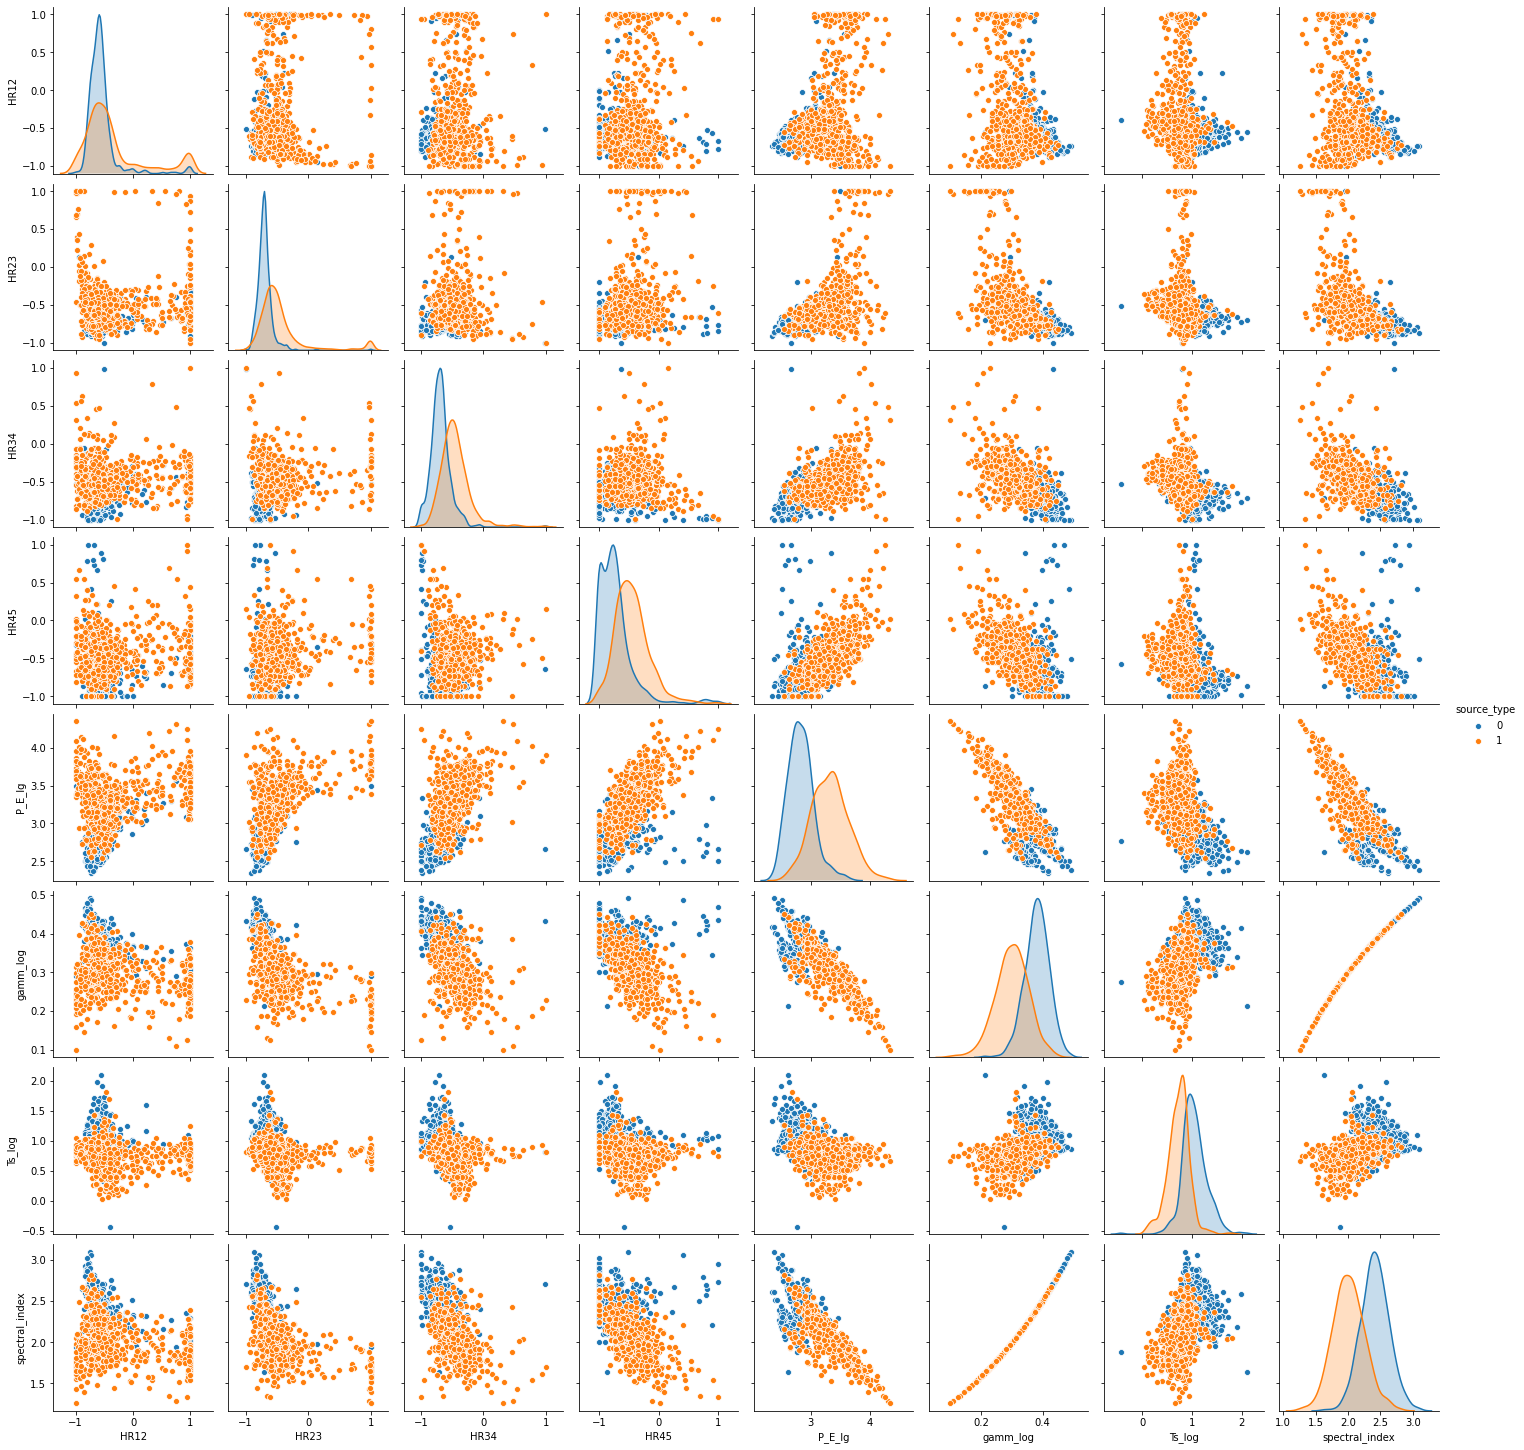

In [0]:
sns_plot= sns.pairplot(df_w,hue=clase, vars=[ 'HR12', 'HR23', 'HR34', 'HR45','P_E_lg', 'gamm_log', 'Ts_log',  'spectral_index'])

In [0]:
sns_plot.savefig("/content/drive/My Drive/tanteo-3.png")


#POBLACIONES


*   BL LAC = 1
*   FSRQ = 0
*   BCU = 2



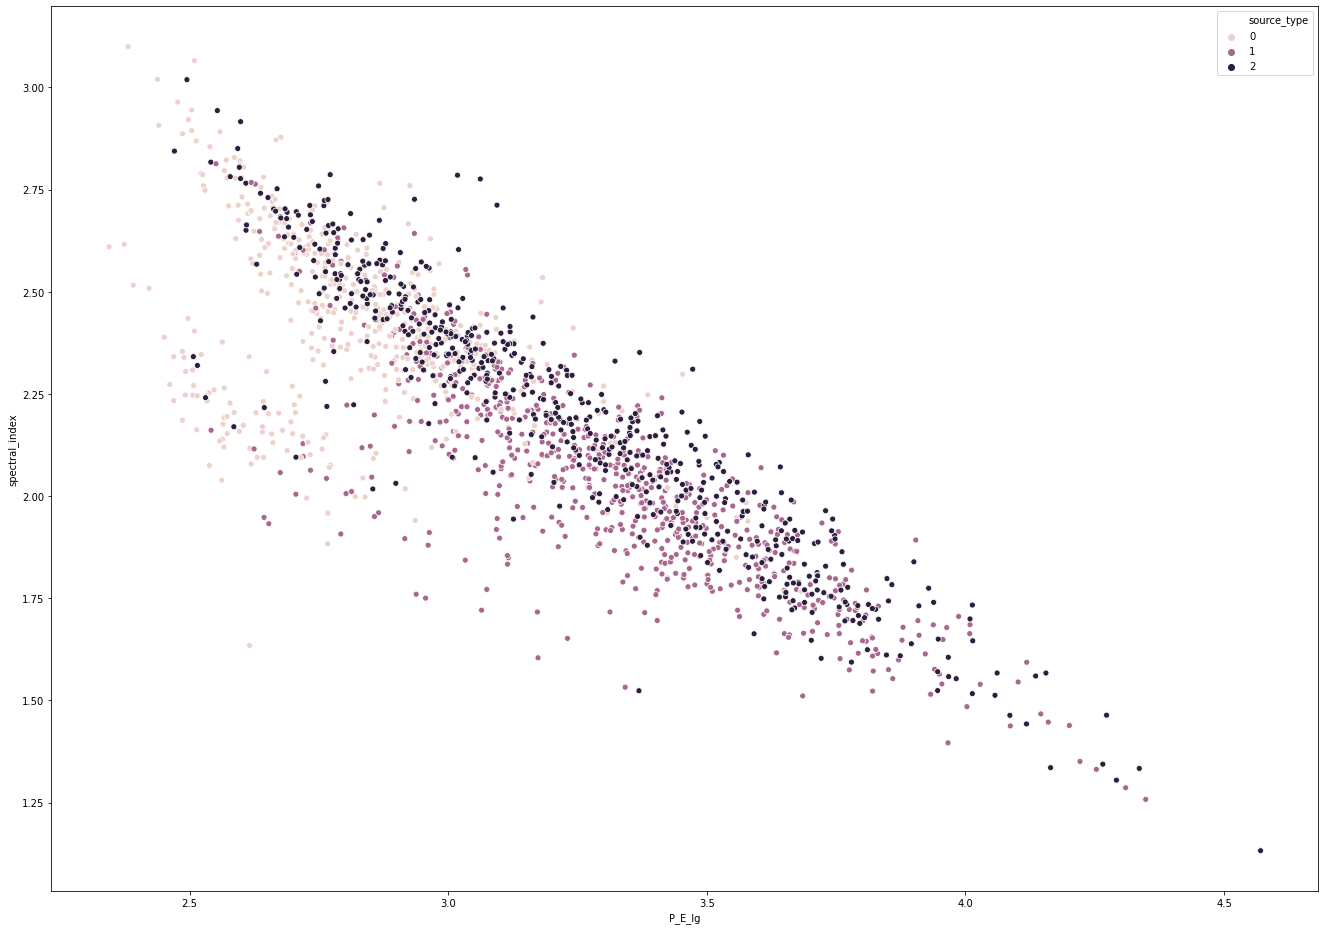

In [0]:
#with sns.axes_style('white'):
#    sns.jointplot("spectral_index", "P_E_lg", df_w, kind='kde')
frames=[df_bl,df_UNK]
result = pd.concat(frames)
grid=sns.scatterplot(x='P_E_lg', y=gamm, data=result, hue=clase)

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 22.7,16.27
#plt.
#plt.axvline(2.8, 1,0.17)


# A simple vista parece que hay dos tipos de poblaciones NO  relaciondas con el tipo de blazar asociado que siguen la misma relacion (pendiente) entre los dos parámetros

In [0]:
result.shape

(1717, 58)

In [0]:
#sns_plot= sns.pairplot(df_w,hue=clase, vars=["spectral_index", "pivot_energy", "curve_significance", f1, f2, f3,f4,"HR23","HR34", "hard_slope"])
#grid.savefig("/content/drive/My Drive/2_poblaciones_blazar.png")
result.head(3)

,name,ra,dec,flux_1_100_gev,spectral_index,spectral_index_error,detection_significance,lii,bii,pivot_energy,flux_density,flux_density_error,energy_flux,energy_flux_error,curve_significance,spectrum_type,powerlaw_index,flux_100_300_mev,flux_100_300_mev_pos_err,flux_100_300_mev_neg_err,nufnu_100_300_mev,sqrt_ts_100_300_mev,flux_0p3_1_gev,flux_0p3_1_gev_pos_err,flux_0p3_1_gev_neg_err,nufnu_0p3_1_gev,sqrt_ts_0p3_1_gev,flux_1_3_gev,flux_1_3_gev_pos_err,flux_1_3_gev_neg_err,nufnu_1_3_gev,sqrt_ts_1_3_gev,flux_3_10_gev,nufnu_3_10_gev,sqrt_ts_3_10_gev,flux_10_100_gev,nufnu_10_100_gev,sqrt_ts_10_100_gev,variability_index,significance_peak,flux_peak,flux_peak_error,time_peak,time_peak_interval,source_type,analysis_flags,HR12,HR23,HR34,hard_slope,soft_slope,P_E_lg,TS_,sig_,gamm_log,Ts_log,sig_log,F100_log,HR45,Unnamed: 0
0,3FGL J1026.4-8542,156.6050,-85.7152,9.074170e-10,2.01336,0.08438,13.433965,300.1673,-23.6462,2222.71,1.858600e-13,2.060600e-14,1.011740e-11,1.150420e-12,0.511,1,2.0134,1.008810e-08,3.018620e-09,-2.949990e-09,2.420950e-12,3.427,1.979730e-09,5.195480e-10,-5.032010e-10,1.357070e-12,4.173,5.411360e-10,1.170220e-10,-1.090790e-10,1.298620e-12,6.251,2.340260e-10,1.604210e-12,8.382,8.555690e-11,1.514590e-12,7.324,41.696239,NaN,NaN,NaN,NaN,NaN,1,0,-0.671900,-0.570675,-0.396188,-0.174486,-0.101225,3.346883,3.103793,0.038038,0.303921,0.491893,-1.419783,-9.042193,-0.464571,NaN
1,3FGL J0046.7-8419,11.6875,-84.3200,2.772770e-10,2.82062,0.13341,6.239794,303.0699,-32.8070,395.73,6.895600e-12,1.036500e-12,6.497270e-12,9.888820e-13,0.647,1,2.8206,1.121860e-08,4.038050e-09,-3.890830e-09,2.493400e-12,2.877,1.951180e-09,5.772040e-10,-5.338970e-10,1.220970e-12,3.740,3.592310e-10,1.122630e-10,-1.019240e-10,7.984120e-13,4.067,2.958340e-11,1.851210e-13,1.964,8.163080e-16,1.085870e-17,0.000,62.983513,NaN,NaN,NaN,NaN,NaN,0,0,-0.703688,-0.689033,-0.847828,0.158795,-0.014655,2.597399,10.093845,0.103689,0.450345,1.004057,-0.984266,-9.557086,-0.999945,NaN
2,3FGL J2202.4-8339,330.6101,-83.6560,1.985760e-09,2.42962,0.06724,23.074068,307.9433,-31.7347,757.27,6.903600e-12,4.258600e-13,2.310780e-11,1.767710e-12,5.157,2,2.4700,3.435640e-08,6.642110e-09,-6.582910e-09,8.378720e-12,5.745,9.672910e-09,8.147200e-10,-8.147200e-10,6.411070e-12,13.874,1.843210e-09,1.753410e-10,-1.753410e-10,4.121440e-12,15.423,2.393800e-10,1.439750e-12,8.077,2.484270e-12,2.610000e-14,0.213,377.103882,16.296301,2.664750e-07,2.336680e-08,55212.719977,2630000.0,0,0,-0.560615,-0.679890,-0.770113,0.090223,0.119275,2.879251,16.343190,0.223498,0.385538,1.213337,-0.650727,-8.702073,-0.979457,NaN


In [0]:
#sns_plot.savefig("tanteo-2.png")

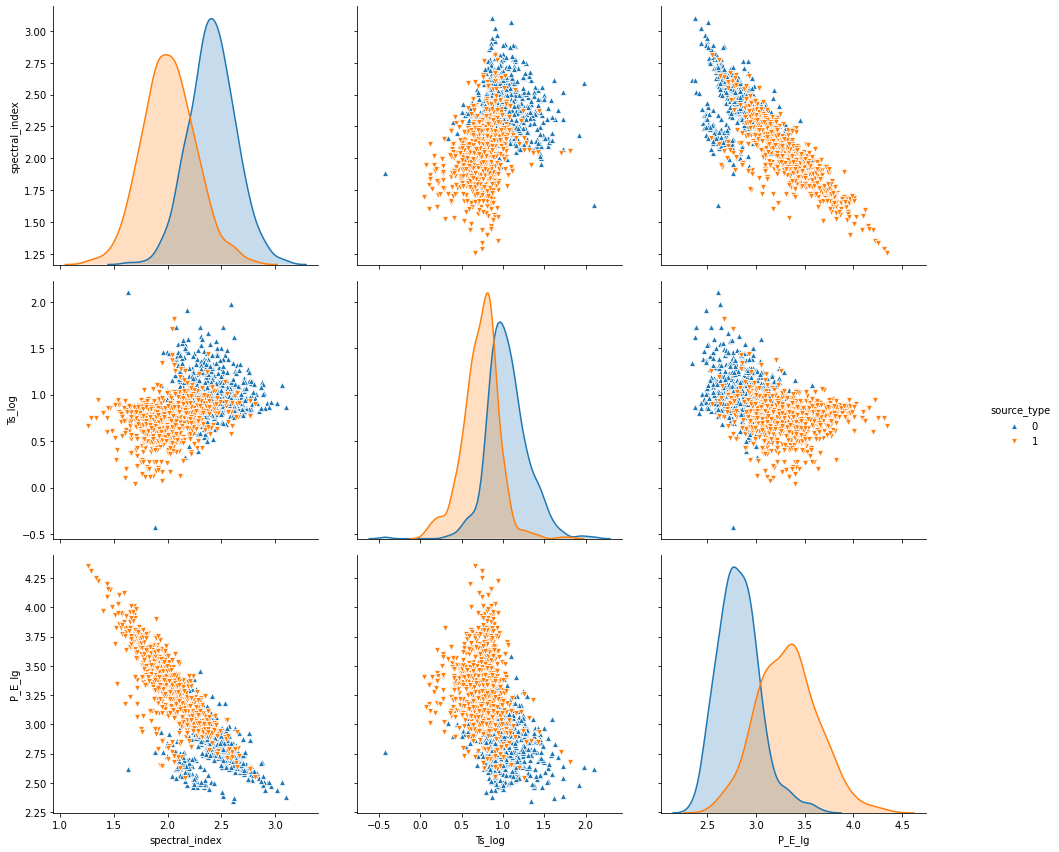

In [0]:
#sns_plot= sns.pairplot(df_w,hue=clase, vars=["spectral_index", "flux_density", "curve_significance", f1, f2, f3,f4,"HR23","HR34", "hard_slope"])
#sns.set(rc={'figure.figsize':(100,100)})
g=sns.pairplot(df_w,hue=clase, vars=[gamm, "Ts_log", "P_E_lg"] , markers=["^","v"])
#g.hue_names=['BL Lac', 'FSRQ']
#vars=[gamm, "Ts_log", "P_E_lg","HR23","HR34"] 
#g.hue_names=['BL Lac', 'FSRQ']
g.fig.set_size_inches(15,12)


<img src="https://drive.google.com/uc?id=1RmPoLNLdJfRnqIRJaJkJYRpyo8jItP3b" width=300>
<img src="https://drive.google.com/uc?id=1ewsvxZJe6sKmkfalDoptYZm73QXpaJkU" width=300>
<img src="https://drive.google.com/uc?id=1jsHOKR3ltMiOJfcDSE_cYnFIVaFpT-It" width=300>

## Imágenes extraidas de "Research and characterisation of blazar candidates among the Fermi/LAT 3FGL catalogue using multivariate classiﬁcations"
#### https://arxiv.org/pdf/1703.01822.pdf

In [0]:
#print(g.hue_names)
#g.hue_names=['BL Lac', FSRQ']
#sns_plot.savefig("Discriminantes_pappers.png")
g.fig.savefig("/content/drive/My Drive/Discriminantes_pappers.png")
# Calculate correlations
#corr =df_bl.corr()
 
# Heatmap
#sns.heatmap(corr)

## Separamos la base de datos en dos conjuntos. El primero contiene todas las características del modelo. Entre ellas seleccionaremos las mas que consideramos mas significativas a priori, aunque esto se puede y debe revisar según avanzemos en el estudio. En el segundo conjunto de datos estan etiquetados cada uno de los casos que utilizaremos para el entrenamiento de los modelos.

In [0]:
features=df_w.columns
features

Index(['name', 'ra', 'dec', 'flux_1_100_gev', 'spectral_index',
       'spectral_index_error', 'detection_significance', 'lii', 'bii',
       'pivot_energy', 'flux_density', 'flux_density_error', 'energy_flux',
       'energy_flux_error', 'curve_significance', 'spectrum_type',
       'powerlaw_index', 'flux_100_300_mev', 'flux_100_300_mev_pos_err',
       'flux_100_300_mev_neg_err', 'nufnu_100_300_mev', 'sqrt_ts_100_300_mev',
       'flux_0p3_1_gev', 'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err',
       'nufnu_0p3_1_gev', 'sqrt_ts_0p3_1_gev', 'flux_1_3_gev',
       'flux_1_3_gev_pos_err', 'flux_1_3_gev_neg_err', 'nufnu_1_3_gev',
       'sqrt_ts_1_3_gev', 'flux_3_10_gev', 'nufnu_3_10_gev',
       'sqrt_ts_3_10_gev', 'flux_10_100_gev', 'nufnu_10_100_gev',
       'sqrt_ts_10_100_gev', 'variability_index', 'significance_peak',
       'flux_peak', 'flux_peak_error', 'time_peak', 'time_peak_interval',
       'source_type', 'analysis_flags', 'HR12', 'HR23', 'HR34', 'hard_slope',
       '

In [0]:
features=[ 'name','ra', 'dec', 'flux_1_100_gev', 'spectral_index',
       'spectral_index_error', 'detection_significance', 'lii',
       'bii', 'pivot_energy', 'flux_density', 'flux_density_error',
       'energy_flux', 'energy_flux_error', 'curve_significance',
       'spectrum_type', 'powerlaw_index', 'flux_100_300_mev',
       'flux_100_300_mev_pos_err', 'flux_100_300_mev_neg_err',
       'nufnu_100_300_mev', 'sqrt_ts_100_300_mev', 'flux_0p3_1_gev',
       'flux_0p3_1_gev_pos_err', 'flux_0p3_1_gev_neg_err', 'nufnu_0p3_1_gev',
       'sqrt_ts_0p3_1_gev', 'flux_1_3_gev', 'flux_1_3_gev_pos_err',
       'flux_1_3_gev_neg_err', 'nufnu_1_3_gev', 'sqrt_ts_1_3_gev',
       'flux_3_10_gev', 'nufnu_3_10_gev', 'sqrt_ts_3_10_gev',
       'flux_10_100_gev', 'nufnu_10_100_gev', 'sqrt_ts_10_100_gev',
       'variability_index', 'significance_peak', 'flux_peak',
       'flux_peak_error', 'time_peak', 'time_peak_interval',
       'analysis_flags']
# se dejan fuera por que estoy       
#, 'HR12', 'HR23', 'HR34', 'hard_slope','TS_', 'sig_', 'gamm_log', 'Ts_log', 'sig_log', 'P_E_lg'
X=df_w[features]

features=[clase]
y=df_w[features]


In [0]:


df_UNK.shape

(573, 58)

In [0]:
#X.to_excel('/content/drive/My Drive/Caracteristicas3FG_raw.xlsx') 
#y.to_excel('/content/drive/My Drive/etiquetas3FG_raw.xlsx') 
#df_UNK.to_excel('/content/drive/My Drive/BCU_raw.xlsx')
result.to_excel('/content/drive/My Drive/BLZARS_FULL_POPULATION_raw_fin.xlsx')
#df_bl.to_excel('/content/drive/My Drive/FULL_POPULATION_raw.xlsx')

In [0]:
df_UNK=pd.read_excel('/content/drive/My Drive/tree_UNK.xlsx')
df_UNK.head(3)
df_UNK.shape

(573, 58)